<a href="https://colab.research.google.com/github/jain-abhinav02/Facial-Keypoint-Detection/blob/master/Facial_Keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c facial-keypoints-detection

  0% 0.00/843k [00:00<?, ?B/s]
100% 843k/843k [00:00<00:00, 56.6MB/s]
  0% 0.00/201k [00:00<?, ?B/s]
100% 201k/201k [00:00<00:00, 64.5MB/s]
 56% 9.00M/16.0M [00:00<00:00, 26.4MB/s]
100% 16.0M/16.0M [00:00<00:00, 40.5MB/s]
 82% 49.0M/60.1M [00:00<00:00, 37.4MB/s]
100% 60.1M/60.1M [00:00<00:00, 88.1MB/s]


In [5]:
!unzip \*.zip

Archive:  training.zip
  inflating: training.csv            

Archive:  test.zip
  inflating: test.csv                

2 archives were successfully processed.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Convolution2D
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.applications.resnet50 import ResNet50
from keras.optimizers import SGD

Using TensorFlow backend.


In [7]:
# Read the training dataset
training = pd.read_csv('training.csv')
training.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


## Old

In [0]:
# Handle missing data
for cols in df.columns:
  #print(cols)
  df[cols]=df[cols].fillna(method='ffill');
  df[cols]=df[cols].fillna(method='backfill');

In [0]:
# create images from image column
x_train=np.zeros((df.shape[0],96,96),dtype='float64')
for i in range(df.shape[0]):
  pixels=df['Image'][i].split(' ')
  arr=np.array(pixels)
  arr=arr.reshape((96,96))
  #print(arr.shape)
  arr=np.asarray(arr,dtype='float64')
  x_train[i]=arr

In [0]:
x_train.shape
type(x_train[0])
x_train[0]
x_train
x_train.shape
xx=np.stack([x_train,x_train,x_train],axis=-1)
xx.shape
print(xx[0][0][0])
print(xx[0])
x_train=xx/255.0

In [9]:
df1=df.drop(columns=['Image'])
y_train=df1.to_numpy(dtype='float64')
y_train.shape

(7049, 30)

In [10]:
print(x_train.shape)
print(y_train.shape)

(7049, 96, 96, 3)
(7049, 30)


In [0]:
x_train1,x_test,y_train1,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=1)

In [0]:
#x_train=np.expand_dims(x_train,axis=3)
#x_train.shape
#x_test=np.expand_dims(x_test,axis=3)
#x_test.shape

(5639, 96, 96, 1)

In [0]:
def get_model0():
  model=Sequential()
  model.add(Conv2D(32,(3,3),input_shape=(96,96,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(3,3)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(3,3)))
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dense(96,activation='relu'))
  model.add(Dense(30,activation='relu'))
  return model

In [0]:
def get_model1():
  model=Sequential()
  model.add(VGG16(include_top=False,input_shape=(96,96,3),pooling='max'))
  model.add(Dense(200,activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(30))
  return model

In [0]:
def get_model2():
  model=Sequential()
  model.add(ResNet50(include_top=False,input_shape=(96,96,3),pooling='max'))
  model.add(Dense(200,activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(30))
  return model

In [0]:
model=get_model2()
model.summary()

In [0]:
opt = SGD(lr=0.01)

In [16]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [41]:
batch_size=256
epochs=10
history=model.fit(x_train1,y_train1,epochs=epochs,batch_size=batch_size,validation_split=0.2)

Train on 4511 samples, validate on 1128 samples
Epoch 1/10
4511/4511 [==============================] - 12s 3ms/step - loss: 9.9273 - mean_absolute_error: 2.4072 - val_loss: 4.4187 - val_mean_absolute_error: 1.5045
Epoch 2/10
4511/4511 [==============================] - 12s 3ms/step - loss: 9.6504 - mean_absolute_error: 2.3828 - val_loss: 3.7110 - val_mean_absolute_error: 1.1358
Epoch 3/10
4511/4511 [==============================] - 13s 3ms/step - loss: 9.8970 - mean_absolute_error: 2.4075 - val_loss: 4.1147 - val_mean_absolute_error: 1.3374
Epoch 4/10
4511/4511 [==============================] - 13s 3ms/step - loss: 9.8504 - mean_absolute_error: 2.4066 - val_loss: 3.1957 - val_mean_absolute_error: 1.0074
Epoch 5/10
4511/4511 [==============================] - 12s 3ms/step - loss: 9.4503 - mean_absolute_error: 2.3610 - val_loss: 3.4982 - val_mean_absolute_error: 1.0294
Epoch 6/10
4511/4511 [==============================] - 12s 3ms/step - loss: 10.0670 - mean_absolute_error: 2.4240 - 

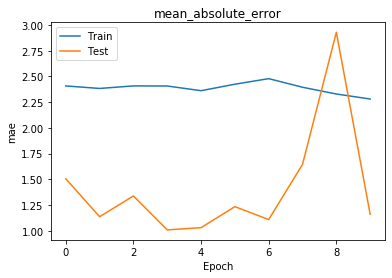

In [42]:
# Plot training & validation accuracy values
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

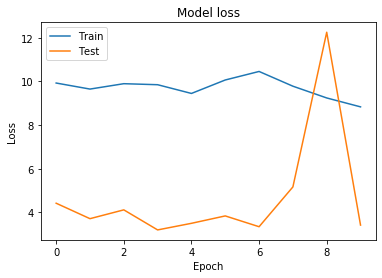

In [43]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [44]:
loss,mae=model.evaluate(x_test,y_test)
print(loss)
print(mae)

1410/1410 [==============================] - 1s 1ms/step
4.263929799685242
1.1372740187543504


In [27]:
df2 = pd.read_csv('test.csv')
df2.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [0]:
testing=np.zeros((df2.shape[0],96,96),dtype='float64')
for i in range(df2.shape[0]):
  pixels=df2['Image'][i].split(' ')
  arr=np.array(pixels)
  arr=arr.reshape((96,96))
  #print(arr.shape)
  arr=np.asarray(arr,dtype='float64')
  testing[i]=arr

In [29]:
tt=np.stack([testing,testing,testing],axis=-1)
testing=tt/255.0
testing.shape

(1783, 96, 96, 3)

In [0]:
res=model.predict(testing)

In [31]:
tab=pd.read_csv('IdLookupTable.csv')
tab.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [0]:
mp= {}
for i,item in enumerate(df.columns):
  mp[item]=i

In [0]:
ans=[]
for i in range(tab.shape[0]):
  imi=tab['ImageId'][i]
  imi=imi-1
  f=tab['FeatureName'][i]
  ind=mp[f]
  ans.append(res[imi][ind])

In [0]:
ans1=np.array(ans,dtype='float64')

In [0]:
ll=[]
for i in range(27124):
  ll.append(i+1)

In [0]:
submission=pd.DataFrame({'RowId':ll,'Location':ans1})
submission.to_csv("submission.csv",index=False)

## Visualisation

In [0]:
def form_img(s,ind):
  pixels=s.split(' ')
  arr=np.array(pixels)
  arr=arr.reshape((96,96))
  #print(arr.shape)
  arr=np.asarray(arr,dtype='float64')
  #plt.imshow(arr,cmap='gray')
  #cv2.imwrite('trainImages/img'+str(ind)+'.png',arr)
  return arr

In [0]:
for i in range(6):
  form_img(df['Image'][i],i)

In [0]:
left_eye=df[['left_eye_center_x','left_eye_center_y']]
left_eye=left_eye.astype('int64')

In [0]:
right_eye=df[['right_eye_center_x','right_eye_center_y']]
right_eye=right_eye.astype('int64')

In [0]:
def xy(s):
  x=[]
  y=[]
  for i,item in enumerate(s.index):
    if i%2==0:
      x.append(s[item])
    else :
      y.append(s[item])
  return (x,y)

In [0]:
dftmp=df[0:5].drop(columns=['Image'])

In [0]:
res= dftmp.apply(xy,axis=1)

In [0]:
# CV2 : BGR
fig,ax=plt.subplots()
for i in range(1):
  x,y=res[i]
  im=cv2.imread('trainImages/img'+str(i)+'.png')
  ax.imshow(im)
  ax.scatter(x,y,c='r')

## New

In [0]:
row = training.shape[0]
features = 30

In [0]:
data = training.drop(columns=['Image'])
mask = data.isna()
mask_np = mask.to_numpy()
mask_np = np.sum(mask_np,axis=1)
mask_np = features - mask_np
train_small = data[mask_np <= 8]
train_big = data[mask_np > 8]

In [10]:
train_small.shape

(4765, 30)

In [11]:
train_big.shape

(2284, 30)

In [12]:
train_small=train_small.dropna(axis= 'columns', thresh=4000)
train_small.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
2284,48.865297,43.918417,23.928389,40.959788,31.113600,66.108117,30.479611,75.195334
2285,66.534784,38.207872,30.261888,38.207872,44.943744,65.844480,46.239232,80.526336
2286,66.125628,36.616188,31.262632,40.600519,53.176552,63.178428,51.848441,76.791559
2287,68.162335,44.118564,33.321574,35.561202,48.602621,59.093994,45.240778,75.597509
2288,65.227685,33.147074,34.003308,37.559299,46.560971,61.995721,48.597357,75.232180


In [0]:
for col in train_small.columns:
  train_small[col]=train_small[col].fillna(train_small[col].median())

In [0]:
null_val = np.zeros(train_big.shape[0])
for col in  train_big:
  null_val+=train_big[col].isna()

In [15]:
null_val.value_counts()

0.0     2140
2.0       87
4.0       28
6.0        9
8.0        8
12.0       5
10.0       3
20.0       2
14.0       2
Name: left_eye_center_x, dtype: int64

In [0]:
train_big = train_big[null_val<=4]

In [17]:
train_big.shape

(2255, 30)

In [0]:
for col in train_big.columns:
  train_big[col]=train_big[col].fillna(train_big[col].median())

In [0]:
# create images from image column
x_train_small=np.zeros((train_small.shape[0],96,96),dtype='float64')
for pos,item in enumerate(train_small.index):
  pixels=training['Image'][item].split(' ')
  arr=np.array(pixels)
  arr=arr.reshape((96,96))
  #print(arr.shape)
  arr=np.asarray(arr,dtype='float64')
  x_train_small[pos]=arr

In [20]:
print(train_small.shape)
print(x_train_small.shape)
type(x_train_small[0])

(4765, 8)
(4765, 96, 96)


numpy.ndarray

In [0]:
x_rgb_small=np.stack([x_train_small,x_train_small,x_train_small],axis=-1)
x_rgb_small=x_rgb_small.astype('float64')
x_rgb_small=x_rgb_small/255.0

In [0]:
x_rgb_small

In [0]:
# create images from image column
x_train_big=np.zeros((train_big.shape[0],96,96),dtype='float64')
for pos,item in enumerate(train_big.index):
  pixels=training['Image'][item].split(' ')
  arr=np.array(pixels)
  arr=arr.reshape((96,96))
  #print(arr.shape)
  arr=np.asarray(arr,dtype='float64')
  x_train_big[pos]=arr

In [24]:
print(train_big.shape)
print(x_train_big.shape)
type(x_train_big[0])

(2255, 30)
(2255, 96, 96)


numpy.ndarray

In [0]:
x_rgb_big=np.stack([x_train_big,x_train_big,x_train_big],axis=-1)
x_rgb_big.shape
x_rgb_big=x_rgb_big/255.0

In [26]:
x_rgb_big.shape

(2255, 96, 96, 3)

In [27]:
y_train_small=train_small.to_numpy(dtype='float64')
print(y_train_small.shape)
y_train_big=train_big.to_numpy(dtype='float64')
print(y_train_big.shape)

(4765, 8)
(2255, 30)


In [0]:
x_train1_small,x_test_small,y_train1_small,y_test_small=train_test_split(x_rgb_small,y_train_small,test_size=0.2,random_state=1)

In [0]:
x_train1_big,x_test_big,y_train1_big,y_test_big=train_test_split(x_rgb_big,y_train_big,test_size=0.2,random_state=1)

In [0]:
print(x_train1_big)

In [0]:
def get_model2_small():
  model=Sequential()
  model.add(ResNet50(include_top=False,input_shape=(96,96,3),pooling='max'))
  model.add(Dense(200,activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(8))
  return model

In [0]:
def get_model2_big():
  model=Sequential()
  model.add(ResNet50(include_top=False,input_shape=(96,96,3),pooling='max'))
  model.add(Dense(200,activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(30))
  return model

In [33]:
model_small=get_model2_small()
model_big=get_model2_big()













94658560/94653016 [==============================] - 3s 0us/step

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
model_small.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 200)               409800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1608      
Total params: 23,999,120
Trainable params: 23,946,000
Non-trainable params: 53,120
_________________________________________________________________


In [35]:
model_big.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 200)               409800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                6030      
Total params: 24,003,542
Trainable params: 23,950,422
Non-trainable params: 53,120
_________________________________________________________________


In [36]:
model_small.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
model_big.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [0]:
batch_size=256
epochs=40
history_small=model_small.fit(x_train1_small,y_train1_small,epochs=epochs,batch_size=batch_size,validation_split=0.2)

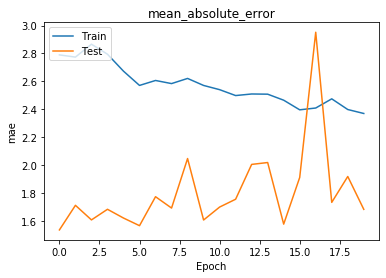

In [72]:
# Plot training & validation accuracy values
plt.plot(history_small.history['mean_absolute_error'])
plt.plot(history_small.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

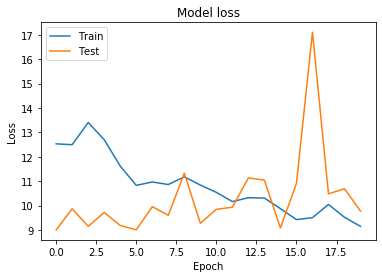

In [73]:
# Plot training & validation loss values
plt.plot(history_small.history['loss'])
plt.plot(history_small.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [74]:
loss,mae=model_small.evaluate(x_test_small,y_test_small)
print(loss)
print(mae)

953/953 [==============================] - 1s 818us/step
5.361188808243022
1.5265380395547041


In [0]:
batch_size=256
epochs=40
history_big=model_big.fit(x_train1_big,y_train1_big,epochs=epochs,batch_size=batch_size,validation_split=0.2)

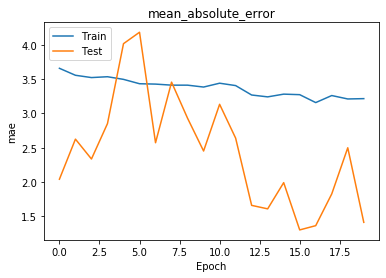

In [76]:
# Plot training & validation accuracy values
plt.plot(history_big.history['mean_absolute_error'])
plt.plot(history_big.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

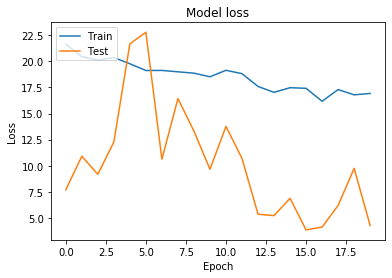

In [77]:
# Plot training & validation loss values
plt.plot(history_big.history['loss'])
plt.plot(history_big.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [78]:
loss,mae=model_big.evaluate(x_test_big,y_test_big)
print(loss)
print(mae)

451/451 [==============================] - 0s 841us/step
4.414774850836879
1.415031526939832


## Submission time

In [45]:
df_test = pd.read_csv('test.csv')
df_test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [0]:
testing=np.zeros((df_test.shape[0],96,96),dtype='float64')
for i in range(df_test.shape[0]):
  pixels=df_test['Image'][i].split(' ')
  arr=np.array(pixels)
  arr=arr.reshape((96,96))
  #print(arr.shape)
  arr=np.asarray(arr,dtype='float64')
  testing[i]=arr

In [47]:
test_rgb=np.stack([testing,testing,testing],axis=-1)
testing=test_rgb/255.0
testing.shape

(1783, 96, 96, 3)

In [48]:
tab=pd.read_csv('IdLookupTable.csv')
tab.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [53]:
train_small.shape

(4765, 8)

In [54]:
train_big.shape

(2255, 30)

In [0]:
mp1= {}
for i,item in enumerate(train_small.columns):
  mp1[item]=i

In [0]:
mp2= {}
for i,item in enumerate(train_big.columns):
  mp2[item]=i

In [0]:
ans=[]
len=tab.shape[0]
i=0
j=0
while i<len:
  while i<len:
    if tab['ImageId'][i] != tab['ImageId'][j] :
      break
    i+=1
  imi=tab['ImageId'][j]
  imi-=1
  print(i)
  if i-j>8 :
    res=model_big.predict(testing[imi:imi+1])
    while j<i:
      f=tab['FeatureName'][j]
      ind=mp2[f]
      ans.append(res[0][ind])
      j+=1
  else:
    res=model_small.predict(testing[imi:imi+1])
    while j<i:
      f=tab['FeatureName'][j]
      ind=mp1[f]
      ans.append(res[0][ind])
      j+=1

In [0]:
ans1=np.array(ans,dtype='float64')

In [0]:
ll=[]
for i in range(27124):
  ll.append(i+1)

In [0]:
submission=pd.DataFrame({'RowId':ll,'Location':ans1})
submission.to_csv("submission.csv",index=False)

In [61]:
train_small.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
2284,48.865297,43.918417,23.928389,40.959788,31.113600,66.108117,30.479611,75.195334
2285,66.534784,38.207872,30.261888,38.207872,44.943744,65.844480,46.239232,80.526336
2286,66.125628,36.616188,31.262632,40.600519,53.176552,63.178428,51.848441,76.791559
2287,68.162335,44.118564,33.321574,35.561202,48.602621,59.093994,45.240778,75.597509
2288,65.227685,33.147074,34.003308,37.559299,46.560971,61.995721,48.597357,75.232180


In [62]:
train_big.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
